In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pprint import pprint
import scipy

In [45]:
data = pd.read_csv("penguins_lter.csv")
colnames = list(data.select_dtypes(["number"]).columns)

species = data["Species"]
island = data["Island"]
cl = data["Culmen Length (mm)"]
cd = data["Culmen Depth (mm)"]
fl = data["Flipper Length (mm)"]
bm = data["Body Mass (g)"]
dc = data["Delta 13 C (o/oo)"]
dn = data["Delta 15 N (o/oo)"]

7


<Figure size 640x480 with 0 Axes>

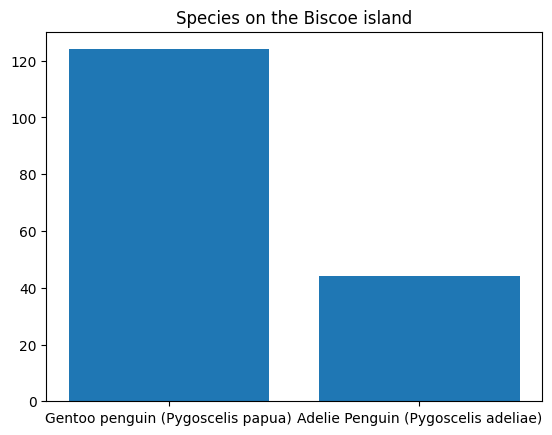

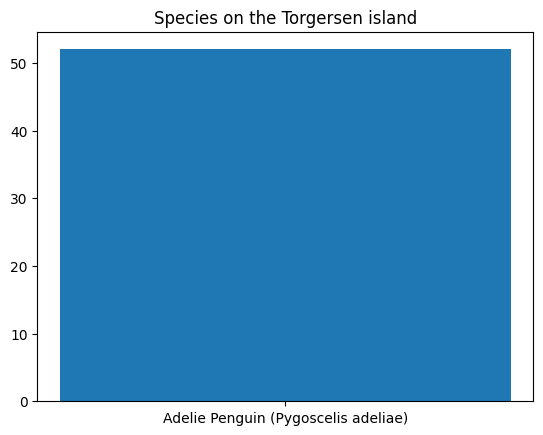

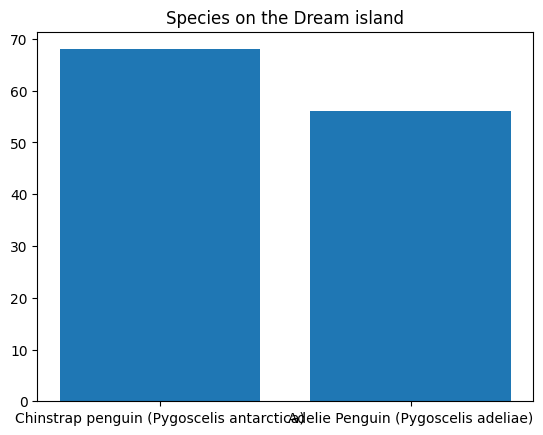

<Figure size 640x480 with 0 Axes>

In [100]:
biscoe = data.loc[data["Island"] == "Biscoe"]["Species"].value_counts()
torgersen = data.loc[data["Island"] == "Torgersen"]["Species"].value_counts()
dream = data.loc[data["Island"] == "Dream"]["Species"].value_counts()

x = biscoe.to_dict()
plt.title("Species on the Biscoe island")
plt.bar(x.keys(), x.values())
plt.figure()

x = torgersen.to_dict()
plt.title("Species on the Torgersen island")
plt.bar(x.keys(), x.values())
plt.figure()

x = dream.to_dict()
plt.title("Species on the Dream island")
plt.bar(x.keys(), x.values())
plt.figure()

0      False
1      False
2      False
3       True
4      False
       ...  
339     True
340    False
341    False
342    False
343    False
Name: Culmen Length (mm), Length: 344, dtype: bool


/opt/intel/oneapi/intelpython/latest/envs/2022.2.0/lib/python3.9/site-packages/numpy/lib/histograms.py:837: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/intel/oneapi/intelpython/latest/envs/2022.2.0/lib/python3.9/site-packages/numpy/lib/histograms.py:838: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([0.00956938, 0.04253057, 0.06060606, 0.05103668, 0.05209995,
        0.05847953, 0.06485912, 0.01701223, 0.00531632, 0.00212653]),
 array([32.1 , 34.85, 37.6 , 40.35, 43.1 , 45.85, 48.6 , 51.35, 54.1 ,
        56.85, 59.6 ]),
 <BarContainer object of 10 artists>)

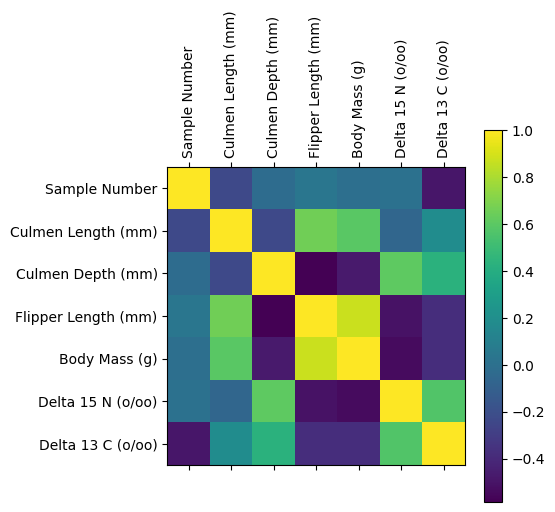

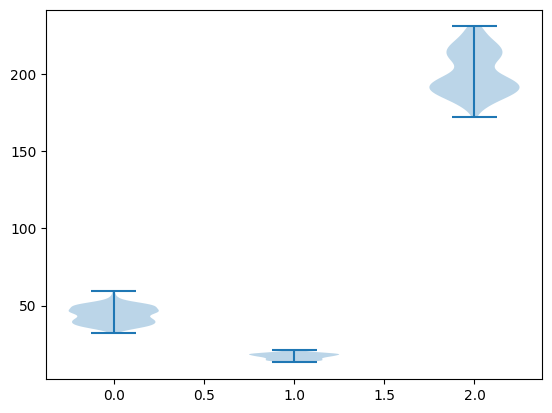

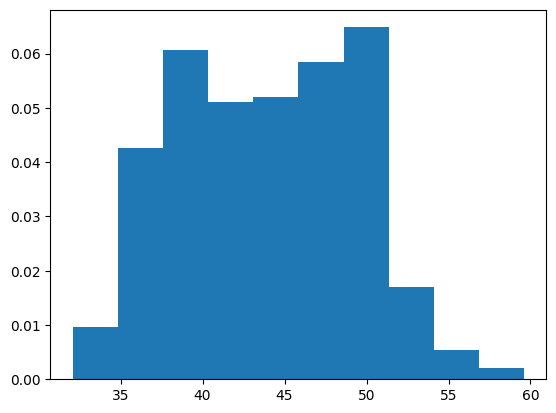

In [71]:

plt.title("Culmens")
plt.scatter(cl, cd)
plt.figure()
plt.title("deltas")
plt.scatter(dc, dn)
plt.figure()
plt.title("Flipper length to body mass")
plt.scatter(fl, bm)
plt.figure()

plt.matshow(data.corr())
plt.colorbar()
plt.xticks(range(7),colnames, rotation=90)
plt.yticks(range(7),colnames)
plt.figure()
clc = cl[~cl.isnull()]
cdc = cd[~cd.isnull()]
flc = fl[~fl.isnull()]
plt.violinplot([clc, cdc, flc], [0, 1, 2])
plt.figure()
plt.hist(cl, density=True)
